In [1]:
import random
import pylab as plt

# Run Functions from Previous Inferential Statistics Class

In [2]:
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

In [7]:
def findPocketReturn(game, numTrials, trialSize):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize)
        pocketReturns.append(trialVals[2])
    return pocketReturns

In [4]:
def playRoulette(game, numSpins, toPrint = True):
    luckyNumber = '2'
    bet = 1
    totRed, totBlack, totPocket = 0.0, 0.0, 0.0
    for i in range(numSpins):
        game.spin()
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(luckyNumber, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting red =', str(100*totRed/numSpins) + '%')
        print('Expected return betting black =', str(100*totBlack/numSpins) + '%')
        print('Expected return betting', luckyNumber, '=',\
             str(100*totPocket/numSpins)+ '%\n')
    return (totRed/numSpins, totBlack/numSpins, totPocket/numSpins)

In [5]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.blackOdds, self.redOdds = 1.0, 1.0
        self.pocketOdds = len(self.pockets) - 1.0
    def spin(self):
        self.ball = random.choice(self.pockets)
    def isBlack(self):
        if type(self.ball) != int:
            return False
        if ((self.ball > 0 and self.ball <= 10) or (self.ball>18 and self.ball<=28)):
            return self.ball%2 == 0
        else:
            return self.ball%2 == 1
    def isRed(self):
        return type(self.ball) == int and not self.isBlack()
    def betBlack(self, amt):
        if self.isBlack():
            return amt*self.blackOdds
        else: return -amt
    def betRed(self, amt):
        if self.isRed():
            return amt*self.redOdds
        else: return -amt*self.redOdds
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

# Testing Central Limit Theorem

Mean of rolling 1 die = 2.5012793906193087, Std = 1.4438115882296998
Mean of rolling 50 dice = 2.496553851820542, Std = 0.20071023423667952


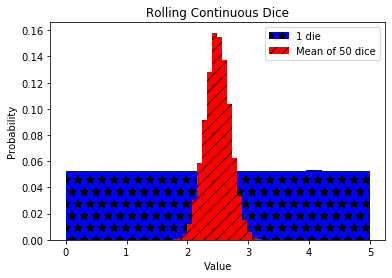

In [8]:
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random()
        means.append(vals/float(numDice))
    plt.hist(means, numBins, color = color, label = legend,
            weights = plt.array(len(means)*[1])/len(means), hatch = style)
    return getMeanAndStd(means)

mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
plt.title('Rolling Continuous Dice')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()

# Weights Example

[0.2 0.2 0.2 0.2 0.2]


(array([0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

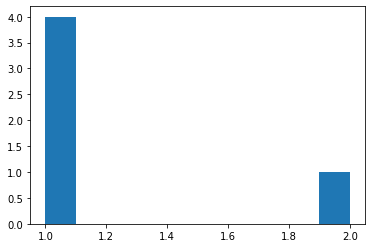

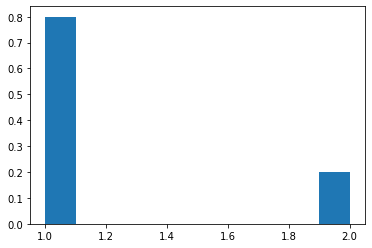

In [9]:
L = [1,1,1,1,2]
plt.hist(L)
factor = plt.array(len(L)*[1])/len(L)
print(factor)
plt.figure()
plt.hist(L, weights = factor)

# Try for Roulette

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of F

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spi

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins 

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of

Expected return betting black = 7.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected retur

Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected r

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -

Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return bet

Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair 

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins 

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting black = 14.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected ret

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -64.0%

200 spins 

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return 

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -21.0%
Expected return betting black = 21.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return 

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair 

Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fai

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fa

Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return be

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red =

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return be

Expected return betting black = 8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -82.0%

200 spins of Fair R

Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return bet

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return 


200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting black = 12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expecte

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 20.0%
Expected return betting black = -20.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -23.0%
Expected return betting black = 23.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of F

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Ro

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of 

Expected return betting black = -3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return

Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected 

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected retur


200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -64.0%

200 spins of Fair

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected retu

Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -19.0%
Expected return betting black = 19.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected retu

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return 

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -82.0%

200 spins of 

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of 

Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return b

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected ret

Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected ret

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -19.0%
Expected return betting black = 19.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -82.0%

200 spins 

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of 

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 21.0%
Expected return betting black = -21.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red =

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 18.0%
Expected return betting black = -18.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected re

Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected 

Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return 

Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected re

Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected retu

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins

Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return

Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return be

Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return 

Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected retur

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return bet


200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 19.0%
Expected return betting black = -19.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return 

Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return b

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 44.0%

200 spins of Fair R

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair 

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair 

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -82.0%

200 spins of Fair

Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Exp

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fa

Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected re


200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected retur

Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return bet

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 62.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return b

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r


200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 18.0%
Expected return betting black = -18.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -22.0%
Expected return betting black = 22.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return 

Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 152.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected ret

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 22.0%
Expected return betting black = -22.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 62.0%

200 spi

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return b

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected ret

Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 18.0%
Expected return betting black = -18.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -19.0%
Expected return betting black = 19.0%
Expected return betting 2 = 44.0%

200 spins o

Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return b

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting black = -8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 21.0%
Expected return betting black = -21.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 8.0%

200 spins of 

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red =

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red =

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of 

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected 

Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected retu

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of

Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair R

Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fai

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 18.0%
Expected return betting black = -18.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return 

Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected r

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting r


200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected re

Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected re

Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return bet


200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected 

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red

Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return

Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Ro

Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected retur

Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected retur

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of 

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected retur

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins 

Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return be

Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of

Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return be

Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected retu

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair 

Expected return betting black = 16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected retur

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair R

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins 

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected retu

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return

Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return be

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red =

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = 7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected retu

200 spins of Fair Roulette
Expected return betting red = -21.0%
Expected return betting black = 21.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected re

Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return be

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected retur

Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected r

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = -2.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected retur

Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red

Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected ret

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 80.0%

200 spins of Fair

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 134.0%

200 spins of Fai

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fa

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red 

Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected retur

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return


200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fai

Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected ret

Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 20.0%
Expected return betting black = -20.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected r

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return b

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red

Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return b

Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected retur

Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 80.0%

200 spin

Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red =

Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return bett

Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of F

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting black = -11.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected re

Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return bet

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -82.0%

200 spins

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -22.0%
Expected return betting black = 22.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -28.0%

200 spins

Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return bet

Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected retur

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins 

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected re

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of F

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -28.0%

200 spins of Fair 

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of 

Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 152.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return 

Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fai

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair R

Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -21.0%
Expected return betting black = 21.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected retur

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fai

Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return b

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected retur

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fa

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return bett


200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return 

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fa

Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return bet

Expected return betting black = 12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -24.0%
Expected return betting black = 24.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected retu

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of 

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins o

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bet

Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair

Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expecte

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Rou

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -21.0%
Expected return betting black = 21.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of 

Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected retu

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -28.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fa


200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fa

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of F

Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return bet

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fa

Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return

Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 152.0%

200 spins

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins 

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected re


200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return bettin


200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -20.0%
Expected return betting black = 20.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected ret

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of F

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of F

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 44.0%

200 spins of F

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 26.0%

200 spins 

Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected r

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair 

Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return b

Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return be

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -82.0%

200 spins of Fa


200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return be

Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected retur

Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 152.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected retu

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 18.0%
Expected return betting black = -18.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return 

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red 

Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of F

Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red 

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair 

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of

Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected retu


200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of F

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 19.0%
Expected return betting black = -19.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected ret

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected re

Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected 

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair

Expected return betting black = 15.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected retur

Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return 

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 20.0%
Expected return betting black = -20.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 62.0%

200 spins of Fair 

Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return

Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return 

Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected retur

Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 18.0%
Expected return betting black = -18.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected ret

Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return be

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins o

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 44.0%

200 spins of F

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return b

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expecte

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair 

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fai

Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected ret

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected r

Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return b

Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return b

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected r

Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected retu

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting


200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected retur

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fa

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fai

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -10.0%

200 spins of 

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected ret

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -28.0%

200 spins of F

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair 

Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected re

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red

Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected retur

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of 

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 80.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of

Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected 

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return bet

Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 152.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected re

Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -21.0%
Expected return betting black = 21.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of 

Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected retur

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Ro

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting r


200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red 

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fa

Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected retu

Expected return betting black = -21.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected re

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected retur

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fai

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 18.0%
Expected return betting black = -18.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected re


200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -20.0%
Expected return betting black = 20.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -10.0%

200 spins o

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fa

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -10.0%

200 spins of 

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of F

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of 

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Rou

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair 

Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expecte

Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -19.0%
Expected return betting black = 19.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expecte

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins 

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting black = 7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected retur

Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected ret

Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return be

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 116.0%

200 spins

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -18.0%
Expected return betting black = 18.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins o

Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fai

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of F

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return b

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of F

Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red =

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spi

Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betti

Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return 

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 21.0%
Expected return betting black = -21.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected 

Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return be

Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected 

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected ret

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Rou

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return be

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -64.0%

200 spins o

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fai

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair R

Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -28.0%

200 spins of Fa

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting black = -5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected ret

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting re

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins 

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -15.0%
Expected return betting black = 15.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting


200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 15.0%
Expected return betting black = -15.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spin

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bettin

Expected return betting black = -5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 152.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -100.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return bett

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting re

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -16.0%
Expected return betting black = 16.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bett

Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fa

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red 

Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -17.0%
Expected return betting black = 17.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 13.0%
Expected return betting black = -13.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected retu

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roule

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 11.0%
Expected return betting black = -11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting

Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected retu

Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected r

Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected retur

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting r

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 14.0%
Expected return betting black = -14.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting r

Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 134.0%

200 spins of Fair Roulette
Expected return betting red = -11.0%
Expected return betting black = 11.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 80.0%

200 spins of

Expected return betting red = 10.0%
Expected return betting black = -10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return b

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -13.0%
Expected return betting black = 13.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betti

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -14.0%
Expected return betting black = 14.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return bett

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting 

Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair 

Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 9.0%
Expected return betting black = -9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -5.0%
Expected return betting black = 5.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 26.0%

200 spins of Fair R

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 116.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bettin

200 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 21.0%
Expected return betting black = -21.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return bet

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -82.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 4.0%
Expected return betting black = -4.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting 

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 0.0%
Expected return betting black = 0.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -8.0%
Expected return betting black = 8.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -9.0%
Expected return betting black = 9.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red

Expected return betting black = 11.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -7.0%
Expected return betting black = 7.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 98.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = -12.0%
Expected return betting black = 12.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected ret

Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 80.0%

200 spins of Fair Roulette
Expected return betting red = 17.0%
Expected return betting black = -17.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = 12.0%
Expected return betting black = -12.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = -28.0%

200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = 26.0%

200 spins of 


200 spins of Fair Roulette
Expected return betting red = -1.0%
Expected return betting black = 1.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = -3.0%
Expected return betting black = 3.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -10.0%

200 spins of Fair Roulette
Expected return betting red = 1.0%
Expected return betting black = -1.0%
Expected return betting 2 = -46.0%

200 spins of Fair Roulette
Expected return betting red = -2.0%
Expected return betting black = 2.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 3.0%
Expected return betting black = -3.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 7.0%
Expected return betting black = -7.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting re


200 spins of Fair Roulette
Expected return betting red = 2.0%
Expected return betting black = -2.0%
Expected return betting 2 = -64.0%

200 spins of Fair Roulette
Expected return betting red = -20.0%
Expected return betting black = 20.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = 8.0%
Expected return betting black = -8.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 16.0%
Expected return betting black = -16.0%
Expected return betting 2 = 8.0%

200 spins of Fair Roulette
Expected return betting red = -6.0%
Expected return betting black = 6.0%
Expected return betting 2 = 26.0%

200 spins of Fair Roulette
Expected return betting red = -4.0%
Expected return betting black = 4.0%
Expected return betting 2 = 44.0%

200 spins of Fair Roulette
Expected return betting red = 5.0%
Expected return betting black = -5.0%
Expected return betting 2 = 62.0%

200 spins of Fair Roulette
Expected return betting

Text(0.5, 1.0, 'Expected Return Betting a Pocket')

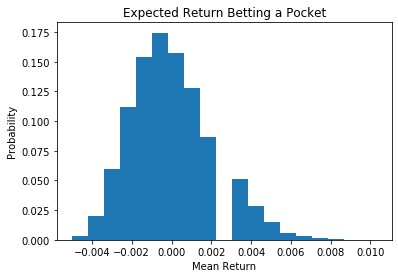

In [8]:
numTrials = 50000
numSpins = 200
game = FairRoulette()

means = []
for i in range(numTrials):
    means.append(findPocketReturn(game, 1, numSpins)[0]/numSpins)

plt.hist(means, bins = 19,
    weights = plt.array(len(means)*[1])/len(means))
plt.xlabel('Mean Return')
plt.ylabel('Probability')
plt.title('Expected Return Betting a Pocket')

# Simulating Buffon-Laplace Method

In [17]:
import random, numpy
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 4*(inCircle/float(numNeedles))

In [18]:
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = numpy.std(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) + ', Std. dev. = ' +
        str(round(sDev, 6)) + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

In [20]:
def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/1.96:
        curEst, sDev = getEst(numNeedles, numTrials)
        numNeedles *= 2
    return curEst

In [21]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
    if (x*x + y*y)**0.5 <= 1.0:
        inCircle += 1
    return 2*(inCircle/float(numNeedles))

# HW

In [22]:
def clt():
    """ Flips a coin to generate a sample. 
        Modifies meanOfMeans and stdOfMeans defined before the function
        to get the means and stddevs based on the sample means. 
        Does not return anything """
    for sampleSize in sampleSizes:
        sampleMeans = []
        for t in range(20):
            sample = flipCoin(sampleSize)
            sampleMeans.append(getMeanAndStd(sample)[0])
        meanOfMeans.append(getMeanAndStd(sampleMeans)[0])
        stdOfMeans.append(getMeanAndStd(sampleMeans)[1])

In [26]:
import random

def monte_carlo_sim_ball(numTrials):
    '''
    Probability of drawing 3 balls of the same color from bag with 3 red and 3 green using monte carlo simulation.
    Input: integer, the number of trials to simulate.
    '''
    count = 0
    for i in range(numTrials):
        bag = ['R', 'R', 'R', 'G', 'G', 'G']
        picks = []
        for j in range(3):
            k = random.choice(bag)
            picks.append(k)
            bag.remove(k)
        if picks[0] == picks[1] == picks[2]:
            count += 1
    return count/numTrials  

In [27]:
monte_carlo_sim_ball(100)

0.15

In [ ]:
We are handed a biased coin and want to infer the probability that it lands on heads. 
Use the code provided for CLT, along with the provided helper function flipCoin, 
to generate confidence intervals for the probability of heads. 
You should only need to change a few lines of code. 
You have two files: flipcoin.py with the code to fill in and with some code to plot the results, 
and coin_flips.txt with the flip data.

####################

## Helper functions          #

####################

def flipCoin(numFlips):

    '''

    Returns the result of numFlips coin flips of a biased coin.

    numFlips (int): the number of times to flip the coin.

    returns: a list of length numFlips, where values are either 1 or 0,

    with 1 indicating Heads and 0 indicating Tails.

    '''

    with open('coin_flips.txt','r') as f:

        all_flips = f.read()

    flips = random.sample(all_flips, numFlips)

    return [int(flip == 'H') for flip in flips]



def getMeanAndStd(X):

    mean = sum(X)/float(len(X))

    tot = 0.0

    for x in X:

        tot += (x - mean)**2

    std = (tot/len(X))**0.5

    return mean, std

    

#############################

## CLT Hands-on                                    #

##                                                             #

## Fill in the missing code                     #

## Do not use numpy/pylab                 #

#############################

meanOfMeans, stdOfMeans = [], []

sampleSizes = range(10, 500, 50)



def clt():

    """ Flips a coin to generate a sample. 

        Modifies meanOfMeans and stdOfMeans defined before the function

        to get the means and stddevs based on the sample means. 

        Does not return anything """

    for sampleSize in sampleSizes:

        sampleMeans = []

        for t in range(20):

            sample = ## FILL THIS IN

            sampleMeans.append(getMeanAndStd(sample)[0])

        ## FILL IN TWO LINES

        ## WHAT TO DO WITH THE SAMPLE MEANS?



Paste only the clt() function.